In [1]:
from QPCA.decomposition.Qpca import QPCA
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, transpile, execute,assemble
from qiskit.visualization import plot_bloch_multivector,plot_histogram,array_to_latex
import matplotlib.pyplot as plt
from QPCA.quantumUtilities.Tomography import StateVectorTomography
import random
from qiskit.extensions import UnitaryGate
from QPCA.preprocessingUtilities.preprocessing_matrix_utilities import generate_matrix
from QPCA.quantumUtilities.quantum_utilities import thetas_computation,from_binary_tree_to_qcircuit

# General use case of tomography 

Here we show that our tomography implementation can be used in general to estimate any quantum circuit' statevectors.

In [2]:
qc=QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.h(1)

qc.draw()

┌───┐┌───┐
q_0: ┤ X ├┤ H ├
     ├───┤└───┘
q_1: ┤ H ├─────
     └───┘

In [3]:
aer=Aer.get_backend('statevector_simulator')
statevector=aer.run(transpile(qc,aer)).result().get_statevector()
array_to_latex(statevector)

/opt/miniconda3/envs/EAGLE_environment/lib/python3.8/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/miniconda3/envs/EAGLE_environment/lib/python3.8/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


<IPython.core.display.Latex object>

In [4]:
StateVectorTomography.state_vector_tomography(qc,n_shots=8000,n_repetitions=1)

{'00': 0.49383701764853555,
 '01': -0.5024937810560445,
 '10': 0.50386009963084,
 '11': -0.4997499374687305}

We can specify the qubits that you want to reconstruct (or measure) and if drawing the circuit that implements the tomography

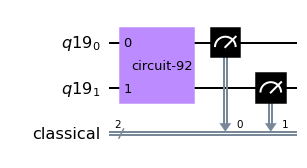

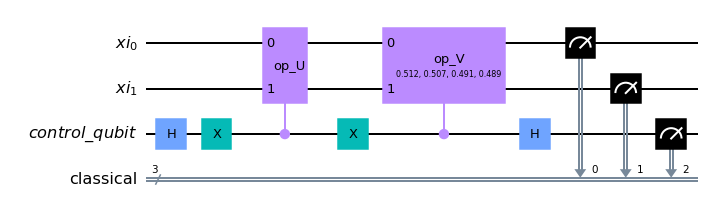

{'00': 0.5119814449762804,
 '01': -0.5069516742254631,
 '10': 0.4914264950122246,
 '11': -0.48925964476952316}

In [5]:
StateVectorTomography.state_vector_tomography(qc,n_shots=8000,n_repetitions=1,drawing_amplitude_circuit=True,drawing_sign_circuit=True)

# Qpca class usability

In [6]:
resolution=8
matrix_dimension=3
lista=list(range(0,2**resolution))
#eigenvalues_list=[0.65,0.25,0.06,0.04]


In [7]:
#4747
seed=900
input_matrix=generate_matrix(matrix_dimension=matrix_dimension,replicate_paper=False,seed=seed)#,eigenvalues_list=eigenvalues_list)

Matrix:
 [[0.58 0.49 0.27]
 [0.49 0.49 0.21]
 [0.27 0.21 0.14]]

eigenvalue: 0.05825170182999686 - eigenvector: [ 0.409 -0.735  0.541]
eigenvalue: 0.003030981753346985 - eigenvector: [-0.581  0.247  0.776]
eigenvalue: 1.1456672711010396 - eigenvector: [-0.704 -0.631 -0.326]


In [8]:
qpca=QPCA().fit(input_matrix,resolution=resolution)

In [9]:
np.linalg.eig(qpca.input_matrix),qpca.input_matrix

((array([0.94922517, 0.00251127, 0.04826356, 0.        ]),
  array([[-0.70395477, -0.58064408,  0.4090234 ,  0.        ],
         [-0.63118319,  0.24738171, -0.73512588,  0.        ],
         [-0.32566158,  0.77566406,  0.54063832,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  1.        ]])),
 array([[0.4793119 , 0.40689113, 0.2271525 , 0.        ],
        [0.40689113, 0.40439972, 0.17641538, 0.        ],
        [0.2271525 , 0.17641538, 0.11628838, 0.        ],
        [0.        , 0.        , 0.        , 0.        ]]))

/Users/tommasofioravanti/Desktop/Intesa/Quantum/Esperimenti/QuPCA/QPCA/postprocessingUtilities/postprocessing_eig_reconstruction.py:104: RuntimeWarning: invalid value encountered in divide
  scaled_statevectors.append(statevector[i:i+len_input_matrix]/max_list[e])


(array([0.94921875, 0.046875  , 0.00390625]),
 array([[ 0.70898157,  0.39336257, -0.60288972],
        [ 0.63125245, -0.71199715,  0.2811138 ],
        [ 0.32801357,  0.51572446,  0.76467412]]))

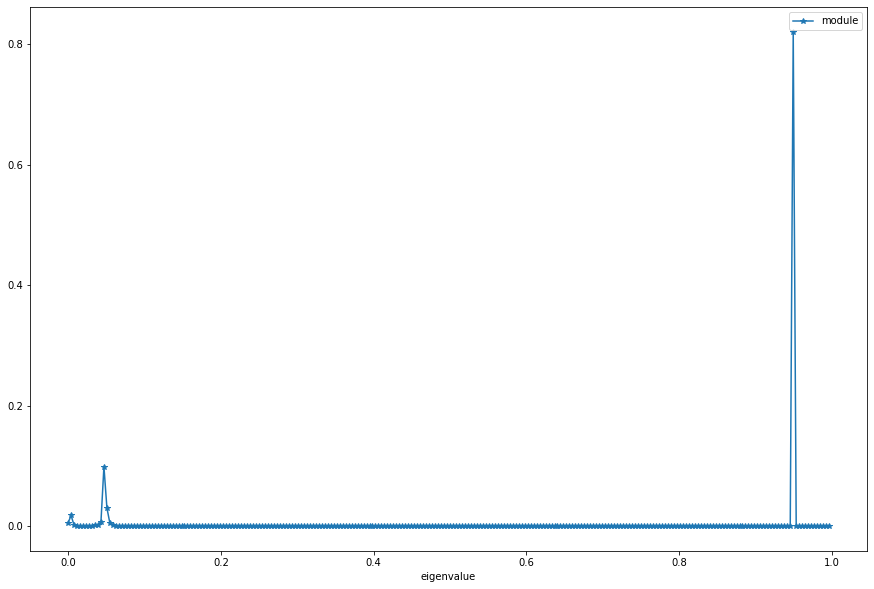

In [18]:
qpca.eigenvectors_reconstruction(n_shots=1000000,n_repetitions=1,plot_peaks=True)

In [19]:
qpca.quantum_input_matrix_reconstruction()

array([[0.58633921, 0.49609135, 0.27573334],
       [0.49609135, 0.48557511, 0.2174587 ],
       [0.27573334, 0.2174587 , 0.14106917]])

In [8]:
qpca.true_input_matrix,np.linalg.eig(qpca.input_matrix)

(array([[0.22867167, 0.18244503, 0.23696264, 0.15987783],
        [0.18244503, 0.20727599, 0.16225141, 0.16647126],
        [0.23696264, 0.16225141, 0.39139492, 0.19164203],
        [0.15987783, 0.16647126, 0.19164203, 0.17265743]]),
 (array([0.8189219 , 0.13262885, 0.03808149, 0.01036776]),
  array([[ 0.49767392,  0.14173162,  0.74992357,  0.41212554],
         [ 0.42879739,  0.62775433, -0.04712204, -0.64794816],
         [ 0.62656256, -0.71859259, -0.13048335, -0.27206277],
         [ 0.41937194,  0.26355521, -0.64681393,  0.57991169]])))